# **Import Necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Mount drive and load the dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Suicide_bombing_attacks.csv'
df = pd.read_csv(file_path)

Mounted at /content/drive


# **Initial Data Overview**

In [3]:
df.head() # display first 5 rows in the dataset

,Date,Islamic Date,Blast Day Type,Holiday Type,Time,City,Latitude,Longitude,Province,Location,...,Targeted Sect if any,Killed Min,Killed Max,Injured Min,Injured Max,No. of Suicide Blasts,Explosive Weight (max),Hospital Names,Temperature(C),Temperature(F)
0,Sunday-November 19-1995,25 Jumaada al-THaany 1416 A.H,Holiday,Weekend,NaN,Islamabad,33.7180,73.0718,Capital,Egyptian Embassy,...,NaN,14.0,15.0,NaN,60,2.0,NaN,NaN,15.835,60.503
1,Monday-November 6-2000,10 SHa`baan 1421 A.H,Working Day,NaN,NaN,Karachi,24.9918,66.9911,Sindh,office of Nawa-e-Waqt,...,NaN,NaN,3.0,NaN,3,1.0,NaN,NaN,23.770,74.786
2,Wednesday-May 8-2002,25 safar 1423 A.H,Working Day,NaN,7:45 AM,Karachi,24.9918,66.9911,Sindh,Pakistan Navy bus Parked outside Five Star She...,...,Christian,13.0,15.0,20.0,40,1.0,2.5 Kg,1.Jinnah Postgraduate Medical Center 2. Civil ...,31.460,88.628
3,Friday-June 14-2002,3 Raby` al-THaany 1423 A.H,Working Day,NaN,11:10:00 AM,Karachi,24.9918,66.9911,Sindh,US Consulate Civil Lines Area,...,Christian,NaN,12.0,NaN,51,1.0,NaN,NaN,31.430,88.574
4,Friday-July 4-2003,4 Jumaada al-awal 1424 A.H,Working Day,NaN,NaN,Quetta,30.2095,67.0182,Baluchistan,Imambargah MeCongy Road Quetta,...,Shiite,44.0,47.0,NaN,65,1.0,NaN,1.CMH Quetta \n2.Civil Hospital 3. Boland Medi...,33.120,91.616


In [4]:
df.info() #display data types and null values in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     988 non-null    object 
 1   Islamic Date             678 non-null    object 
 2   Blast Day Type           967 non-null    object 
 3   Holiday Type             144 non-null    object 
 4   Time                     566 non-null    object 
 5   City                     988 non-null    object 
 6   Latitude                 983 non-null    float64
 7   Longitude                983 non-null    object 
 8   Province                 988 non-null    object 
 9   Location                 982 non-null    object 
 10  Location Category        988 non-null    object 
 11  Location Sensitivity     988 non-null    object 
 12  Open/Closed Space        918 non-null    object 
 13  Influencing Event/Event  378 non-null    object 
 14  Target Type              9

In [5]:
df.describe()

,Latitude,Killed Min,Killed Max,Injured Min,No. of Suicide Blasts,Temperature(C),Temperature(F)
count,983.000000,696.00000,988.000000,726.000000,824.000000,978.000000,974.000000
mean,32.618279,14.79023,15.253138,31.498623,1.116505,21.093650,69.939612
std,2.475619,17.61733,19.957268,38.656426,0.395625,8.375656,15.081500
min,24.879503,0.00000,0.000000,0.000000,1.000000,-2.370000,27.734000
25%,31.823800,3.00000,3.000000,7.000000,1.000000,14.650000,58.282250
50%,33.583300,8.00000,8.000000,20.000000,1.000000,21.295000,70.331000
75%,34.004300,20.25000,18.000000,40.000000,1.000000,28.145000,82.499000
max,35.383300,125.00000,148.000000,320.000000,4.000000,44.000000,111.000000


In [6]:
df.shape # total data rows and columns

(988, 25)

In [7]:
df.columns

Index(['Date', 'Islamic Date', 'Blast Day Type', 'Holiday Type', 'Time',
       'City', 'Latitude', 'Longitude', 'Province', 'Location',
       'Location Category', 'Location Sensitivity', 'Open/Closed Space',
       'Influencing Event/Event', 'Target Type', 'Targeted Sect if any',
       'Killed Min', 'Killed Max', 'Injured Min', 'Injured Max',
       'No. of Suicide Blasts', 'Explosive Weight (max)', 'Hospital Names',
       'Temperature(C)', 'Temperature(F)'],
      dtype='object')

# **Identifying Missing Values**

In [8]:
print("Missing Values:")
df.isnull().sum()

Missing Values:


,0
Date,0
Islamic Date,310
Blast Day Type,21
Holiday Type,844
Time,422
City,0
Latitude,5
Longitude,5
Province,0
Location,6


# **Handling Missing Values**

In [52]:
df['Explosive Weight (max)'] = pd.to_numeric(df['Explosive Weight (max)'], errors='coerce') #convert to numeric

df['Date'] = pd.to_datetime(df['Date'], errors='coerce') #convert to datetime
df['Year'] = df['Date'].dt.year # creating Year column
df['Year'] = df['Year'].astype(int) #change to integer type

df['Blast Day Type'] = df['Blast Day Type'].fillna("Unknown")
df['Holiday Type'] = df['Holiday Type'].fillna("None")
df['Time'] = df['Time'].fillna("Unknown")
df['Location'] = df['Location'].fillna("Unknown")
df['Open/Closed Space'] = df['Open/Closed Space'].fillna("Unknown")
df['Influencing Event/Event'] = df['Influencing Event/Event'].fillna("Unclear")
df['Targeted Sect if any'] = df['Targeted Sect if any'].fillna("None")
df['Hospital Names'] = df['Hospital Names'].fillna("Unknown")

In [10]:
# Drop unnecessary columns
df.drop(columns=["Islamic Date", "Temperature(F)"], inplace=True)

In [53]:
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')
df['Injured Max'] = pd.to_numeric(df['Injured Max'], errors='coerce')
df['Explosive Weight (max)'] = pd.to_numeric(df['Explosive Weight (max)'], errors='coerce')

# filling missing vals for Latitude and Longitude using group-wise means
df['Latitude'] = df['Latitude'].fillna(df.groupby(['Province', 'City'])['Latitude'].transform('mean'))
df['Longitude'] = df['Longitude'].fillna(df.groupby(['Province', 'City'])['Longitude'].transform('mean'))

df['Killed Min'] = df['Killed Min'].fillna(0)
df['Injured Min'] = df['Injured Min'].fillna(0)
df['Injured Max'] = df['Injured Max'].fillna(0)
df['No. of Suicide Blasts'] = df['No. of Suicide Blasts'].fillna(df['No. of Suicide Blasts'].median())
df['Explosive Weight (max)'] = df['Explosive Weight (max)'].fillna(df['Explosive Weight (max)'].median())
df['Temperature(C)'] = df['Temperature(C)'].fillna(df['Temperature(C)'].mean())

In [14]:
df = df[df['Date'].notna()] # drop rows with missing date value

In [15]:
# Final check for remaining missing values
print("Remaining missing values:\n", df.isnull().sum())

Remaining missing values:
 Date                       0
Blast Day Type             0
Holiday Type               0
Time                       0
City                       0
Latitude                   0
Longitude                  0
Province                   0
Location                   0
Location Category          0
Location Sensitivity       0
Open/Closed Space          0
Influencing Event/Event    0
Target Type                0
Targeted Sect if any       0
Killed Min                 0
Killed Max                 0
Injured Min                0
Injured Max                0
No. of Suicide Blasts      0
Explosive Weight (max)     0
Hospital Names             0
Temperature(C)             0
Year                       0
dtype: int64


# **Time Series - Number of Attacks per Year**

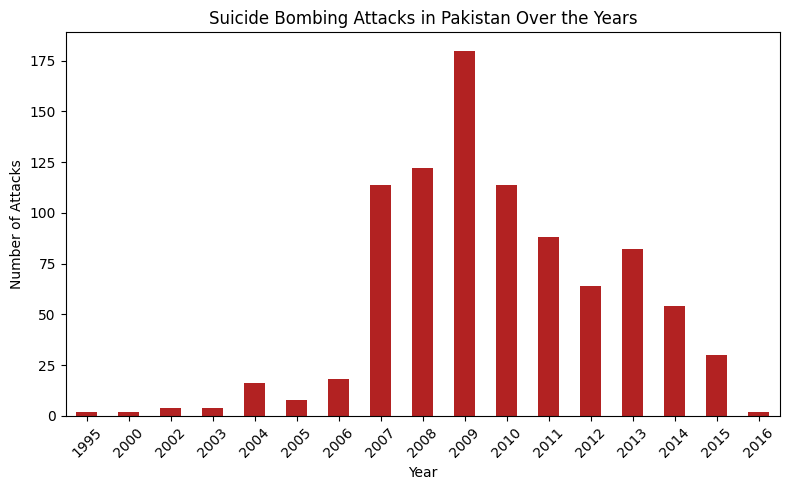

In [19]:
attacks_per_year = df['Year'].value_counts().sort_index()
attacks_per_year.plot(kind='bar', color='firebrick', figsize=(8,5))
plt.title('Suicide Bombing Attacks in Pakistan Over the Years')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.ylabel('Number of Attacks')
plt.tight_layout()
plt.show()

# **Fatalities Per Year**

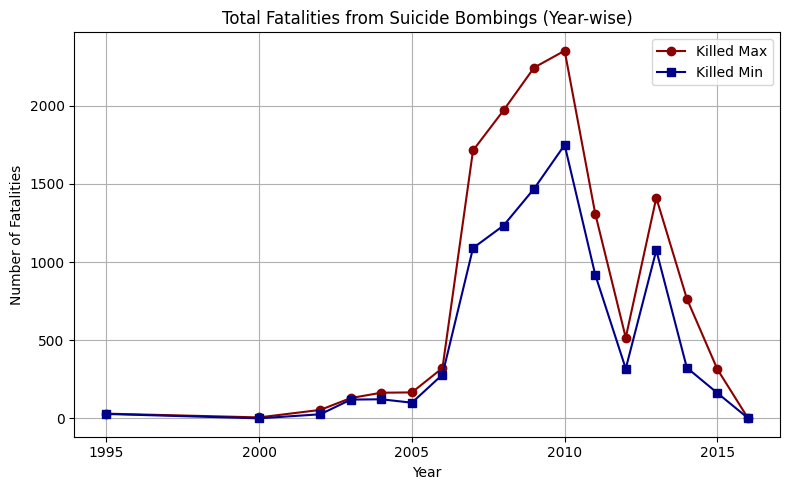

In [26]:
yearly_fatalities = df.groupby('Year')[['Killed Max', 'Killed Min']].sum()

plt.figure(figsize=(8, 5))
plt.plot(yearly_fatalities.index, yearly_fatalities['Killed Max'], marker='o', color='darkred', label='Killed Max')
plt.plot(yearly_fatalities.index, yearly_fatalities['Killed Min'], marker='s', color='darkblue', label='Killed Min')

plt.title("Total Fatalities from Suicide Bombings (Year-wise)")
plt.xlabel("Year")
plt.ylabel("Number of Fatalities")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# **Killed vs Injured Per Year**

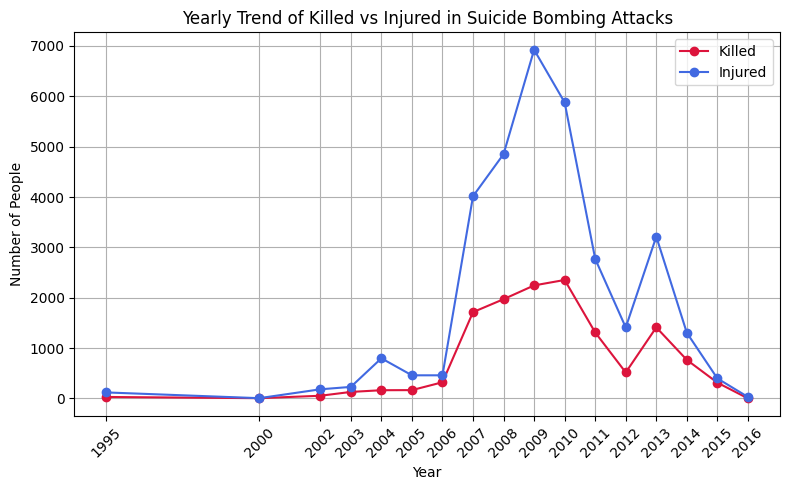

In [54]:
yearly_stats = df.groupby('Year')[['Killed Max', 'Injured Max']].sum().reset_index()

plt.figure(figsize=(8, 5))

plt.plot(yearly_stats['Year'], yearly_stats['Killed Max'],
         marker='o', linestyle='-', color='crimson', label='Killed')

plt.plot(yearly_stats['Year'], yearly_stats['Injured Max'],
         marker='o', linestyle='-', color='royalblue', label='Injured')

plt.xlabel("Year")
plt.ylabel("Number of People")
plt.title("Yearly Trend of Killed vs Injured in Suicide Bombing Attacks")
plt.legend()
plt.grid(True)
plt.xticks(yearly_stats['Year'], rotation=45)
plt.tight_layout()

plt.show()

# **Attacks by Province**

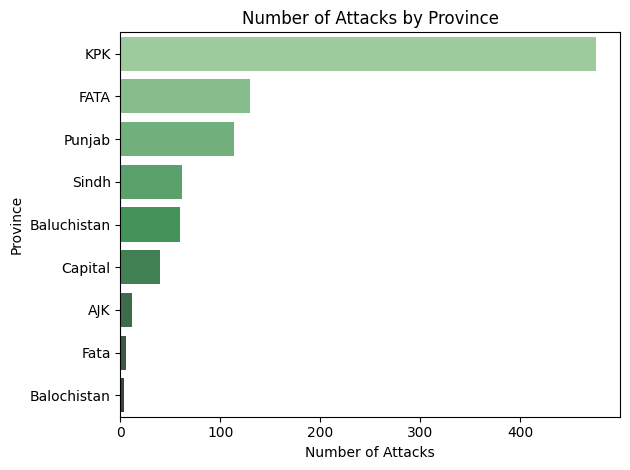

In [51]:
sns.countplot(data=df, y='Province', order=df['Province'].value_counts().index, palette='Greens_d')
plt.title('Number of Attacks by Province')
plt.xlabel('Number of Attacks')
plt.ylabel('Province')
plt.tight_layout()
plt.show()

In [32]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# **Most Fatal Attacks Per City**

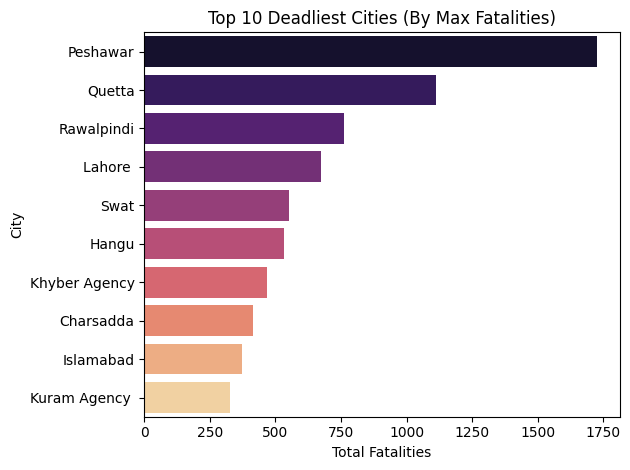

In [55]:
top_cities = df.groupby('City')['Killed Max'].sum().sort_values(ascending=False).head(10)

sns.barplot(x=top_cities.values, y=top_cities.index, palette='magma')
plt.title('Top 10 Deadliest Cities (By Max Fatalities)')
plt.xlabel('Total Fatalities')
plt.ylabel('City')
plt.tight_layout()
plt.show()

# **Target Type Distribution**

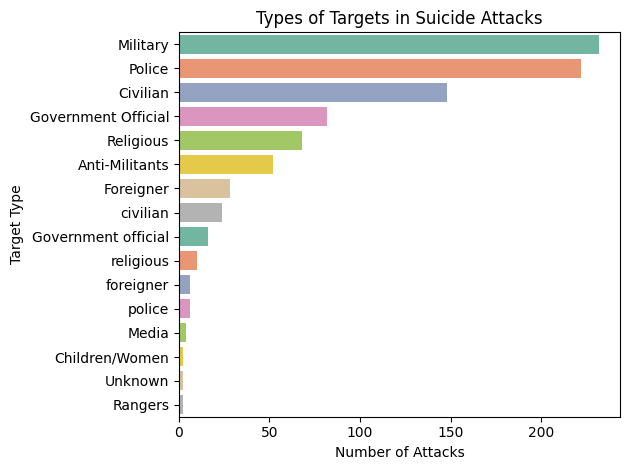

In [35]:
sns.countplot(data=df, y='Target Type', order=df['Target Type'].value_counts().index, palette='Set2')
plt.title('Types of Targets in Suicide Attacks')
plt.xlabel('Number of Attacks')
plt.ylabel('Target Type')
plt.tight_layout()
plt.show()

# **No. of Suicide Blasts per Attack**

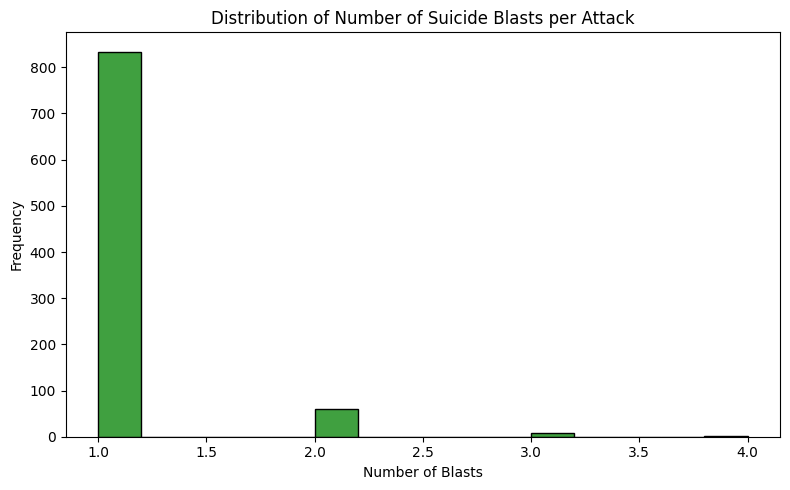

In [37]:
plt.figure(figsize=(8, 5))
sns.histplot(df['No. of Suicide Blasts'].dropna(), bins=15, color='Green')
plt.title("Distribution of Number of Suicide Blasts per Attack")
plt.xlabel("Number of Blasts")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# **Fatalities vs Temperature**

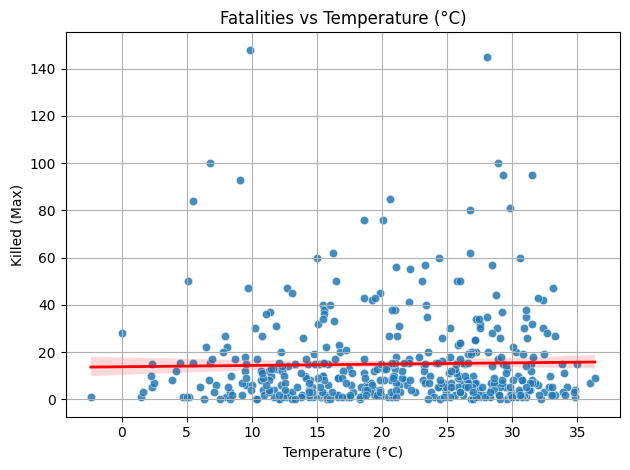

In [56]:
#to check whether attacks occur more in extreme weather
sns.scatterplot(data=df, x='Temperature(C)', y='Killed Max', alpha=0.6)
sns.regplot(data=df, x='Temperature(C)', y='Killed Max', scatter=False, color='red', line_kws={'linewidth':2})#plot regression line(best-fit line)
plt.title("Fatalities vs Temperature (°C)")
plt.xlabel("Temperature (°C)")
plt.ylabel("Killed (Max)")
plt.grid(True)
plt.tight_layout()
plt.show()
#flat line shows no significant relationship between temp and fatalities

# **Attacks on Holidays**

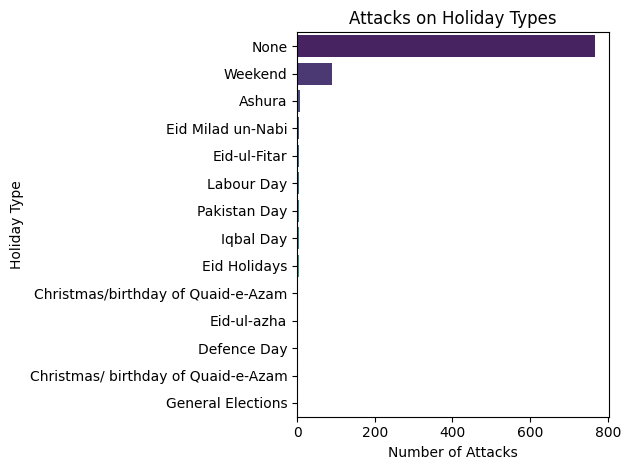

In [46]:
#how many attacks occur on holidays
holiday_counts = df['Holiday Type'].value_counts()
sns.barplot(x=holiday_counts.values, y=holiday_counts.index, palette="viridis")
plt.title("Attacks on Holiday Types")
plt.xlabel("Number of Attacks")
plt.ylabel("Holiday Type")
plt.tight_layout()
plt.show()

# **Attacks and Influencing Events**

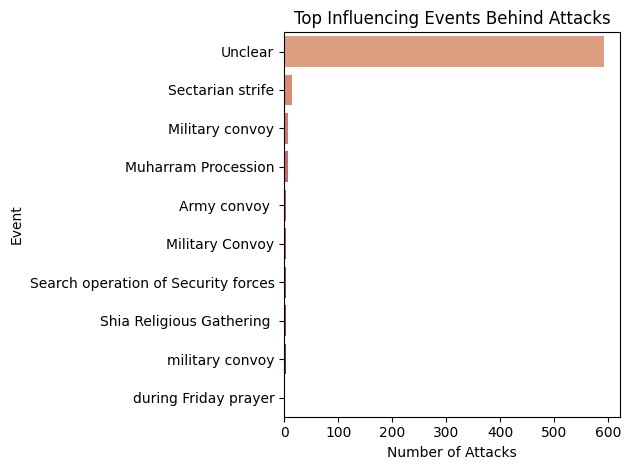

In [47]:
influencing_events = df['Influencing Event/Event'].dropna().value_counts().head(10)

sns.barplot(y=influencing_events.index, x=influencing_events.values, palette='flare')
plt.title("Top Influencing Events Behind Attacks")
plt.xlabel("Number of Attacks")
plt.ylabel("Event")
plt.tight_layout()
plt.show()

# **Explosive Weight Distribution**

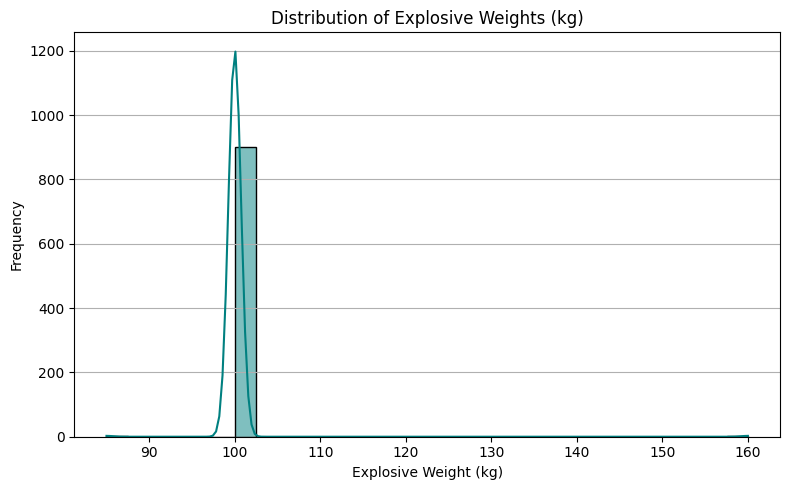

In [57]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Explosive Weight (max)'], kde=True, bins=30, color='teal')
plt.title('Distribution of Explosive Weights (kg)')
plt.xlabel('Explosive Weight (kg)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# **Heatmap**

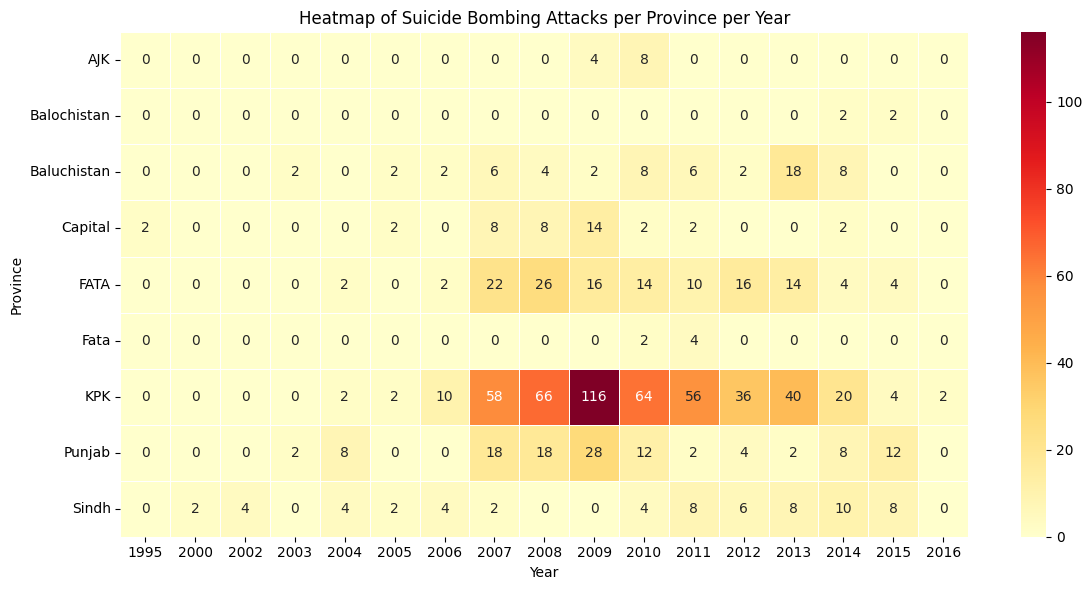

In [73]:
attack_counts = df.groupby(['Province', 'Year']).size().reset_index(name='Attack Count')
attack_pivot = attack_counts.pivot(index='Province', columns='Year', values='Attack Count').fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(attack_pivot, cmap='YlOrRd', linewidths=0.5, annot=True, fmt=".0f")
plt.title('Heatmap of Suicide Bombing Attacks per Province per Year')
plt.xlabel('Year')
plt.ylabel('Province')
plt.tight_layout()
plt.show()

# **Correlation Matrix**

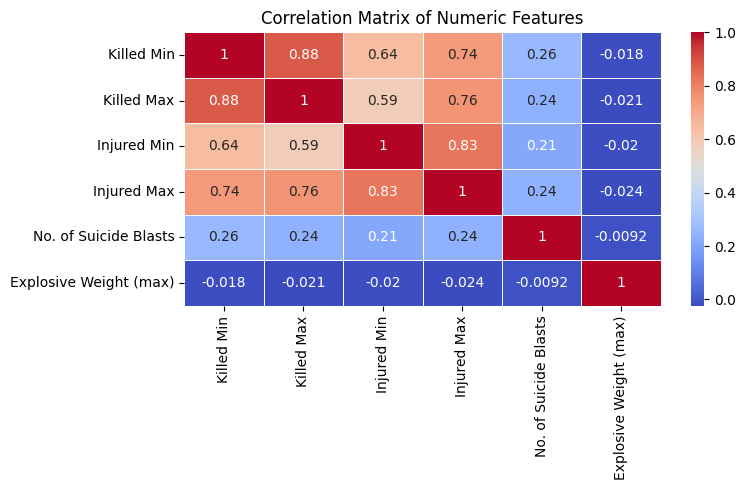

In [71]:
num_cols = [
    'Killed Min', 'Killed Max',
    'Injured Min', 'Injured Max',
    'No. of Suicide Blasts',
    'Explosive Weight (max)'
]
correlation_matrix = df[num_cols].corr()

plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()